In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/rice-image-dataset")

print("Path to dataset files:", path)

c:\Users\EL-HARES\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\EL-HARES\.cache\kagglehub\datasets\muratkokludataset\rice-image-dataset\versions\1


In [4]:
# import requirement libraries and tools
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set the path to the dataset
dataset_path = 'Rice_Image_Dataset'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
  
  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
    
        # Store the label for the image in the labels list
        labels.append(subfolder)
 
 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

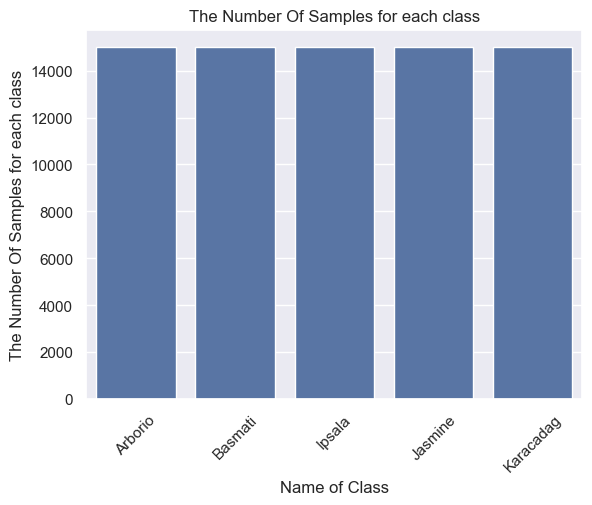

In [6]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")
ax.set_title("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

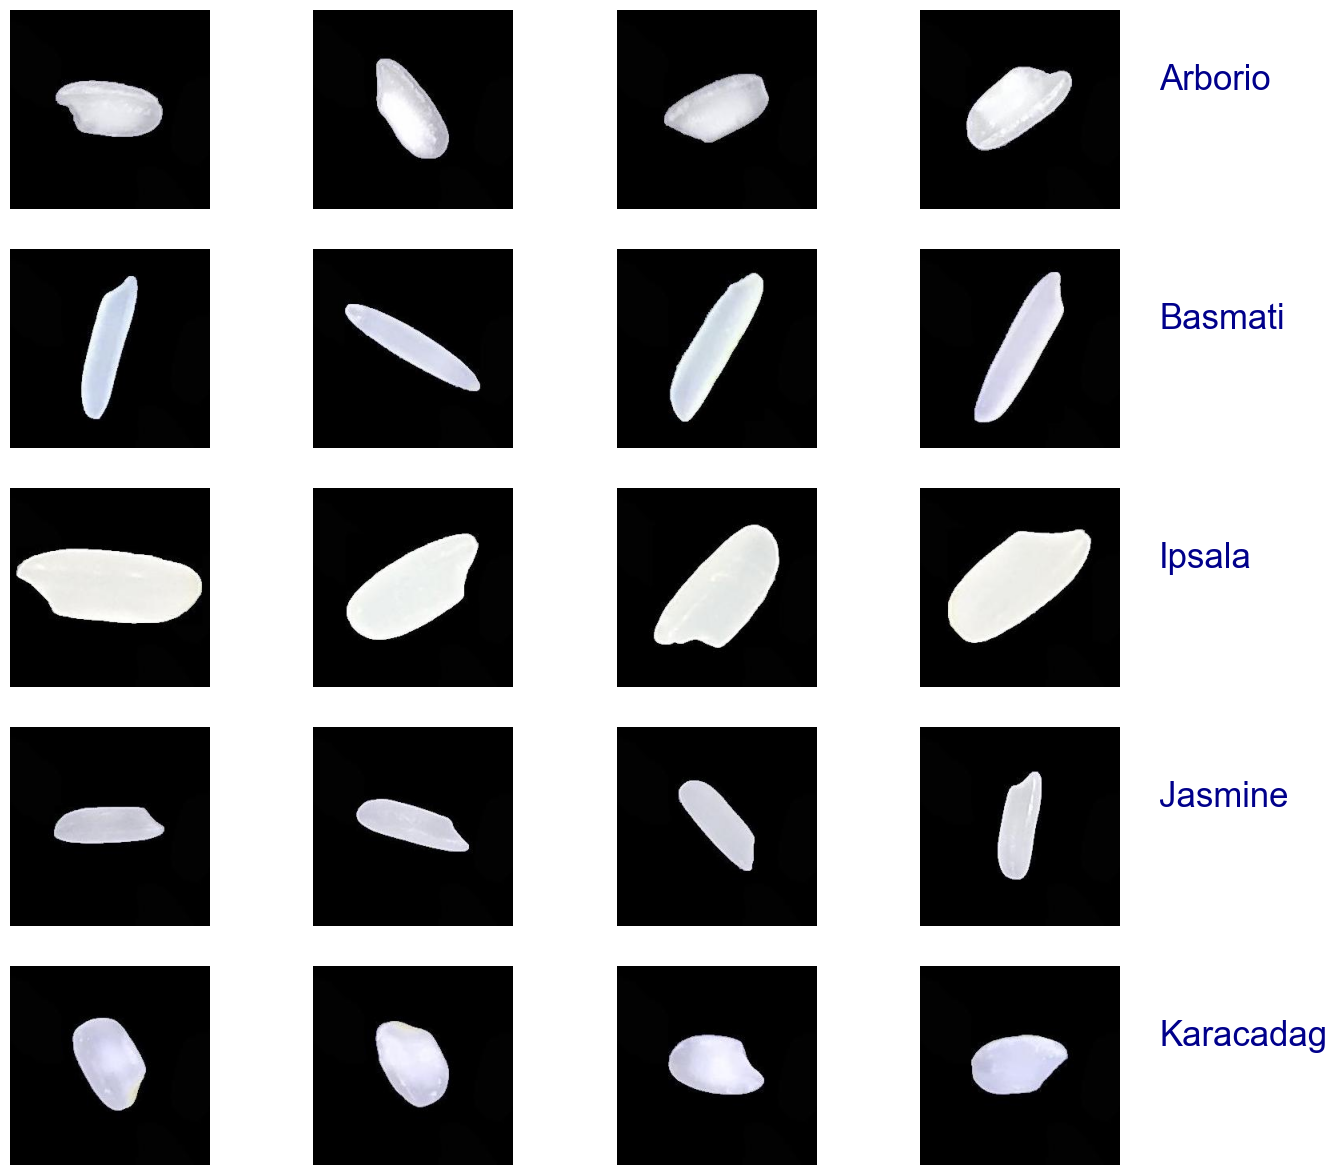

In [7]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(5, 4, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first four images in the category
    filepaths = df[df['label'] == category]['image'].values[:4]
    
    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')
    
    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
print("Done")

Done


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)



In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


Number of images in each class (training set):
label
Karacadag    12071
Basmati      12005
Jasmine      12004
Arborio      12003
Ipsala       11917
Name: count, dtype: int64

Number of images in each class (test set):
label
Ipsala       3083
Arborio      2997
Jasmine      2996
Basmati      2995
Karacadag    2929
Name: count, dtype: int64

Number of images in each class (batch after augmentation):
0    8
4    7
3    7
2    6
1    4
Name: count, dtype: int64


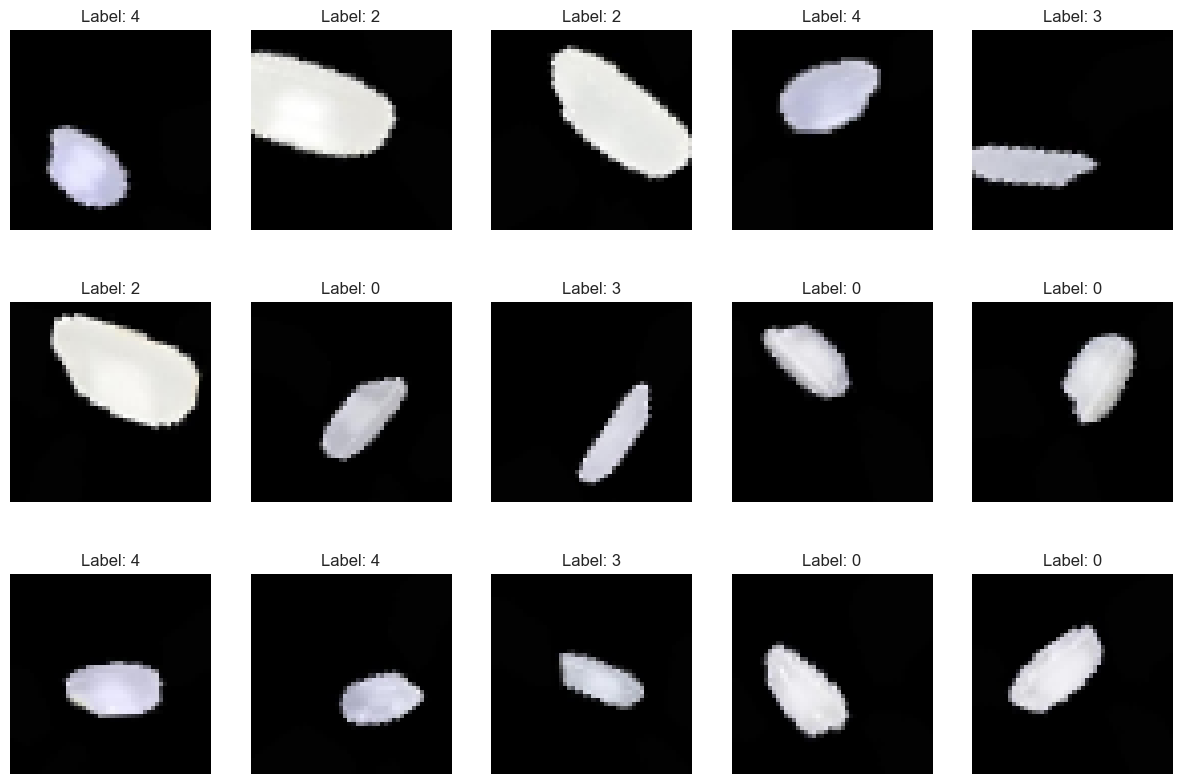

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Count the number of images in each class in the original datasets
train_class_counts = df_train['label'].value_counts()
test_class_counts = df_test['label'].value_counts()

print("Number of images in each class (training set):")
print(train_class_counts)
print("\nNumber of images in each class (test set):")
print(test_class_counts)

# Get a batch of images and labels from the train generator
images, labels = next(train_generator)

# Convert one-hot encoded labels to class indices
label_indices = np.argmax(labels, axis=1)

# Count the number of images in each class in the batch
batch_class_counts = pd.Series(label_indices).value_counts()

print("\nNumber of images in each class (batch after augmentation):")
print(batch_class_counts)

# Plot the first 15 images in the batch
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {label_indices[i]}")
    plt.axis('off')
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
print("Done")

Done


In [64]:
# Compile the model
model.compile(loss='categorical_crossentropy'
              , optimizer='adam'
              , metrics=['accuracy', 'precision', 'recall', 'f1_score'])

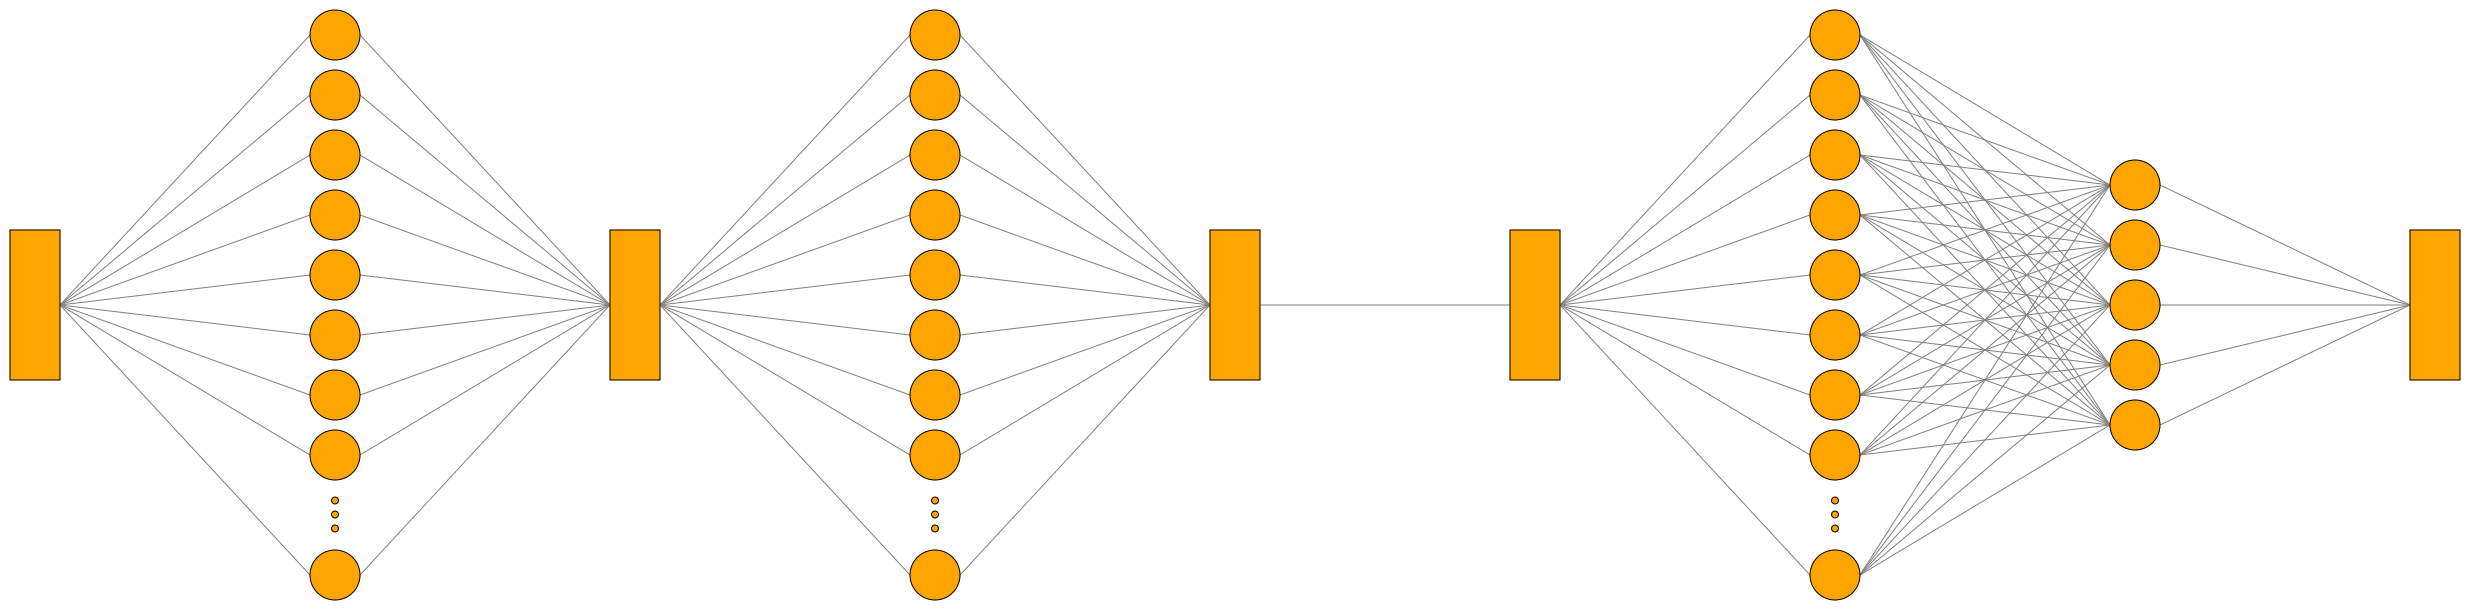

In [13]:
import visualkeras


visualkeras.graph_view(model).show() 
visualkeras.graph_view(model, to_file='model_graph.png')

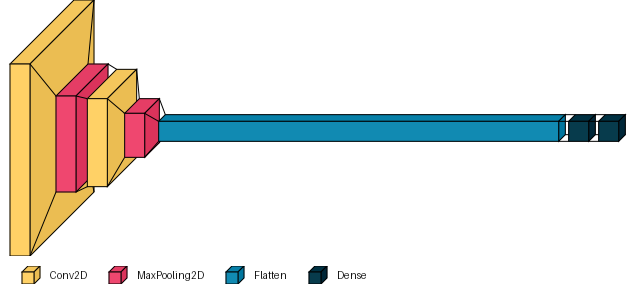

In [14]:
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, legend=True, to_file='model_with_labels.png') 

In [15]:
# Train the model on the training data
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 611s 324ms/step - accuracy: 0.7642 - f1_score: 0.7609 - loss: 0.5715 - precision: 0.8574 - recall: 0.6852 - val_accuracy: 0.9503 - val_f1_score: 0.9504 - val_loss: 0.1409 - val_precision: 0.9527 - val_recall: 0.9482
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 96ms/step - accuracy: 0.9416 - f1_score: 0.9416 - loss: 0.1613 - precision: 0.9436 - recall: 0.9393 - val_accuracy: 0.9413 - val_f1_score: 0.9408 - val_loss: 0.1521 - val_precision: 0.9444 - val_recall: 0.9383
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 178s 95ms/step - accuracy: 0.9570 - f1_score: 0.9571 - loss: 0.1187 - precision: 0.9585 - recall: 0.9557 - val_accuracy: 0.9712 - val_f1_score: 0.9712 - val_loss: 0.0832 - val_precision: 0.9722 - val_recall: 0.9701
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 192s 102ms/step - accuracy: 0.9643 - f1_score: 0.9645 - loss: 0.0982 - precision: 0.9651 - recall: 0.9633 - val_accuracy: 0.9693 - val_f1_score: 0.9690 - val_loss: 0.0896 - val_precision

In [40]:
avg_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])
# Calculate the average validation accuracy
avg_val_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])
print(f"Average Training Accuracy: {avg_train_accuracy:.2f}")
print(f"Average Validation Accuracy: {avg_val_accuracy:.2f}")

avg_train_f1_score = sum(history.history['f1_score']) / len(history.history['f1_score'])
# Calculate the average validation f1_score
avg_val_f1_score = sum(history.history['val_f1_score']) / len(history.history['val_f1_score'])
print(f"Average Training f1_score: {avg_train_f1_score}")
print(f"Average Validation f1_score: {avg_val_f1_score}")

avg_train_precision = sum(history.history['precision']) / len(history.history['precision'])
# Calculate the average validation precision
avg_val_precision = sum(history.history['val_precision']) / len(history.history['val_precision'])
print(f"Average Training precision: {avg_train_precision:.2f}")
print(f"Average Validation precision: {avg_val_precision:.2f}")


avg_train_recall = sum(history.history['recall']) / len(history.history['recall'])
# Calculate the average validation recall
avg_val_recall = sum(history.history['val_recall']) / len(history.history['val_recall'])
print(f"Average Training recall: {avg_train_recall:.2f}")
print(f"Average Validation recall: {avg_val_recall:.2f}")

avg_train_loss = sum(history.history['loss']) / len(history.history['loss'])
# Calculate the average validation loss
avg_val_loss = sum(history.history['val_loss']) / len(history.history['val_loss'])
print(f"Average Training loss: {avg_train_loss:.2f}")
print(f"Average Validation loss: {avg_val_loss:.2f}")

Average Training Accuracy: 0.96
Average Validation Accuracy: 0.97
Average Training f1_score: [0.9448608 0.9637038 0.992828  0.9359148 0.9663469]
Average Validation f1_score: [0.9607976 0.9777495 0.9980475 0.9553917 0.9786606]
Average Training precision: 0.96
Average Validation precision: 0.98
Average Training recall: 0.96
Average Validation recall: 0.97
Average Training loss: 0.11
Average Validation loss: 0.07


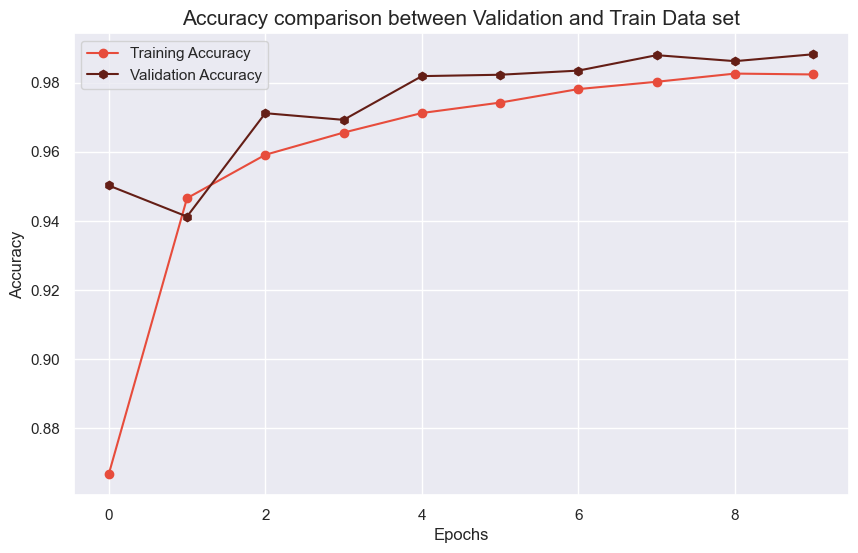

In [41]:
# Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], color="#E74C3C", marker='o', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='#641E16', marker='h', label='Validation Accuracy')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.show()

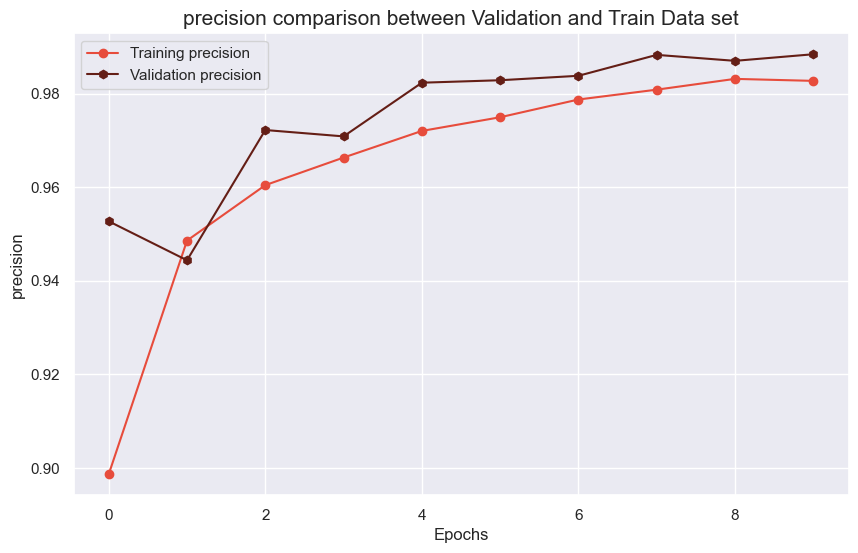

In [42]:
# precision comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['precision'], color="#E74C3C", marker='o', label='Training precision')
plt.plot(history.history['val_precision'], color='#641E16', marker='h', label='Validation precision')
plt.title('precision comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('precision', fontsize=12)
plt.legend()
plt.show()

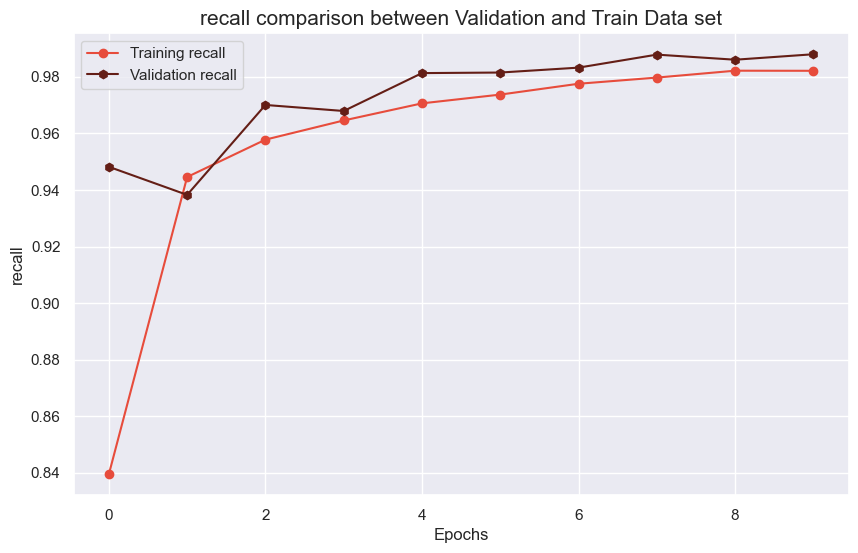

In [43]:
# recall comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['recall'], color="#E74C3C", marker='o', label='Training recall')
plt.plot(history.history['val_recall'], color='#641E16', marker='h', label='Validation recall')
plt.title('recall comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('recall', fontsize=12)
plt.legend()
plt.show()

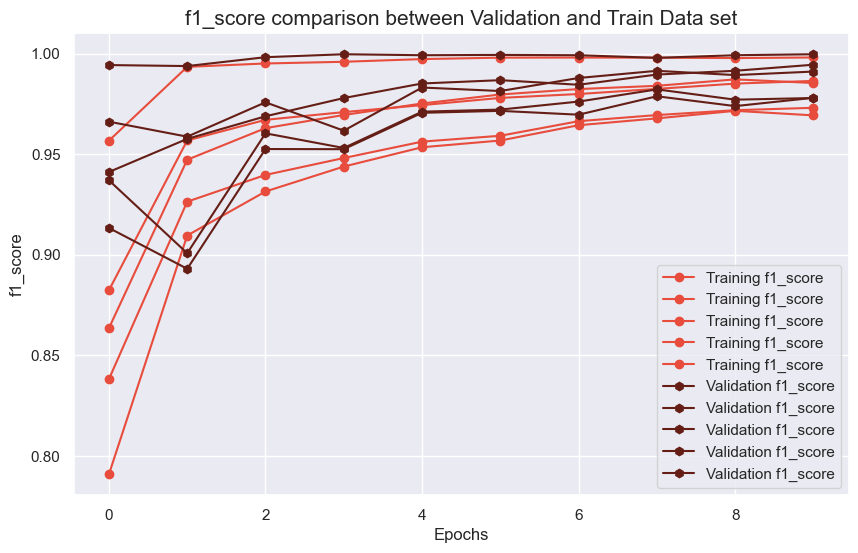

In [44]:
# f1_score comparison between Validation and Train Data set
plt.figure(figsize=(10, 6))
plt.plot(history.history['f1_score'], color="#E74C3C", marker='o', label='Training f1_score')
plt.plot(history.history['val_f1_score'], color='#641E16', marker='h', label='Validation f1_score')
plt.title('f1_score comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.legend()
plt.show()

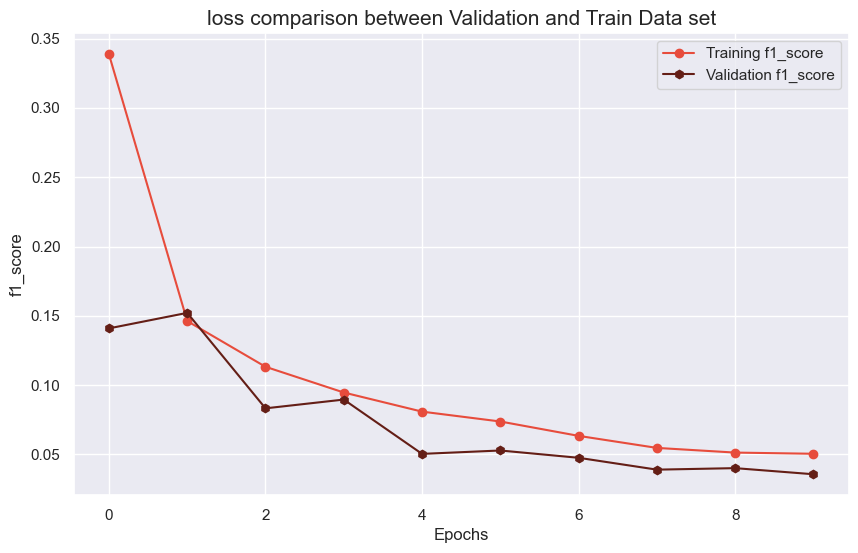

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color="#E74C3C", marker='o', label='Training f1_score')
plt.plot(history.history['val_loss'], color='#641E16', marker='h', label='Validation f1_score')
plt.title('loss comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('f1_score', fontsize=12)
plt.legend()
plt.show()

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


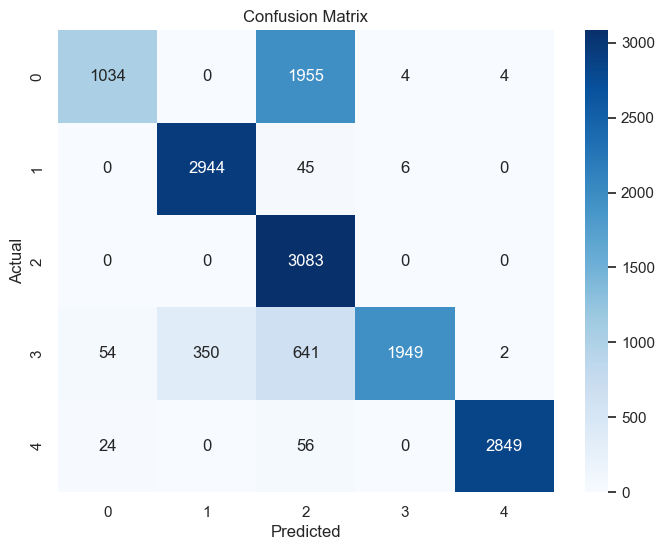

In [46]:
from sklearn.metrics import confusion_matrix

# Preprocess the test images
test_images = np.array([plt.imread(img_path) for img_path in X_test])
test_images = tf.image.resize(test_images, (50, 50)) / 255.0

# Get the true classes
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()